club    position  minutes_played  match_played  goals  assists  \
0    22  Goalkeeper            1230            13      0        0   
1    22     Forward            1199            13      4        6   
2    22     Forward            1106            12     15        1   
3    22  Midfielder            1077            13      0        4   
4    22    Defender            1076            12      0        0   

   distance_covered  
0               408  
1                67  
2                55  
3                57  
4                37


üìå Informa√ß√µes Gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   club              747 non-null    int64 
 1   position          747 non-null    object
 2   minutes_played    747 non-null    int64 
 3   match_played      747 non-null    int64 
 4   goals             747 non-null    int64 
 5   assists           747 non-null    int64 
 6   distance_covered  747 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 41.0+ KB


None


üìà Estat√≠sticas Descritivas:


club  minutes_played  match_played       goals     assists  \
count  747.000000       747.00000    747.000000  747.000000  747.000000   
mean    15.554217       331.61178      5.089692    0.492637    0.376171   
std      9.083508       248.37193      2.721425    1.313321    0.845502   
min      0.000000         1.00000      1.000000    0.000000    0.000000   
25%      8.000000       116.00000      3.000000    0.000000    0.000000   
50%     15.000000       301.00000      5.000000    0.000000    0.000000   
75%     23.000000       492.00000      7.000000    0.000000    0.000000   
max     31.000000      1230.00000     13.000000   15.000000    7.000000   

       distance_covered  
count        747.000000  
mean         242.113788  
std          150.673445  
min            0.000000  
25%          111.500000  
50%          237.000000  
75%          370.500000  
max          513.000000


üìä Distribui√ß√£o da vari√°vel alvo 'position':


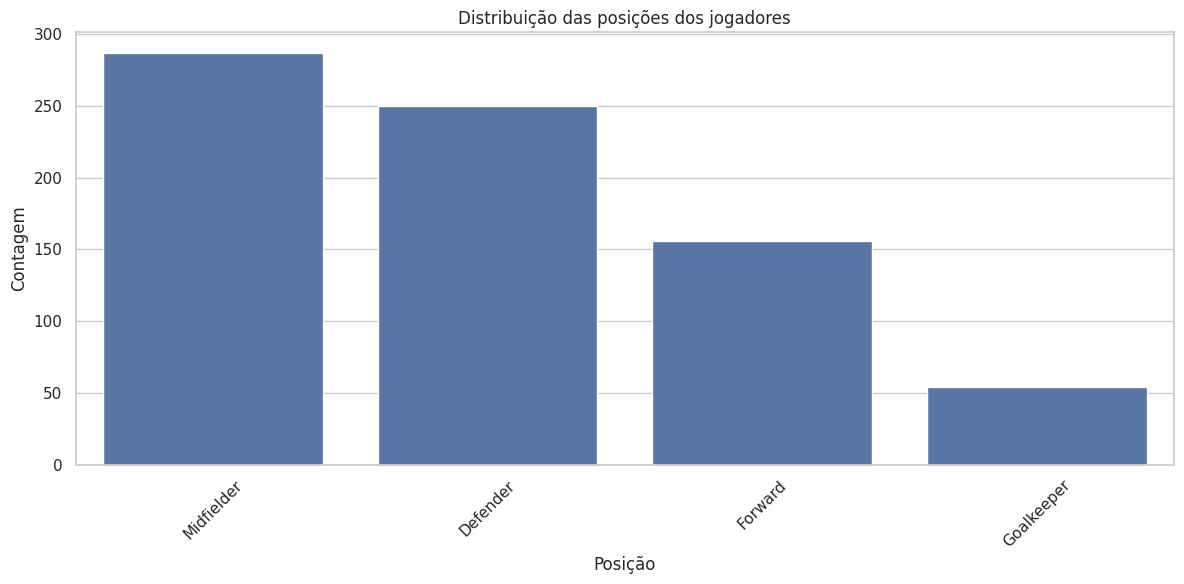

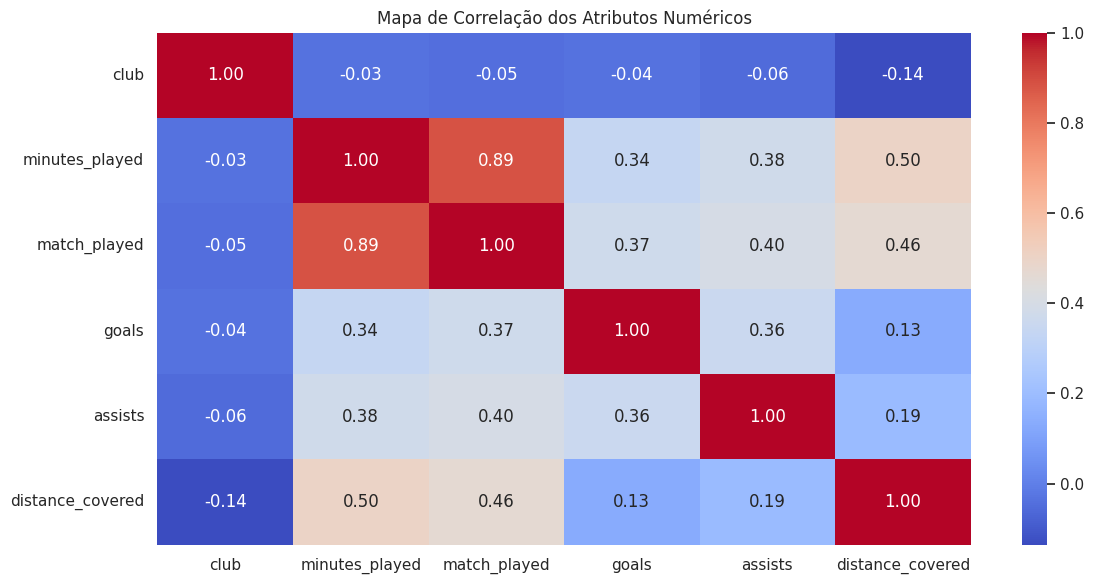

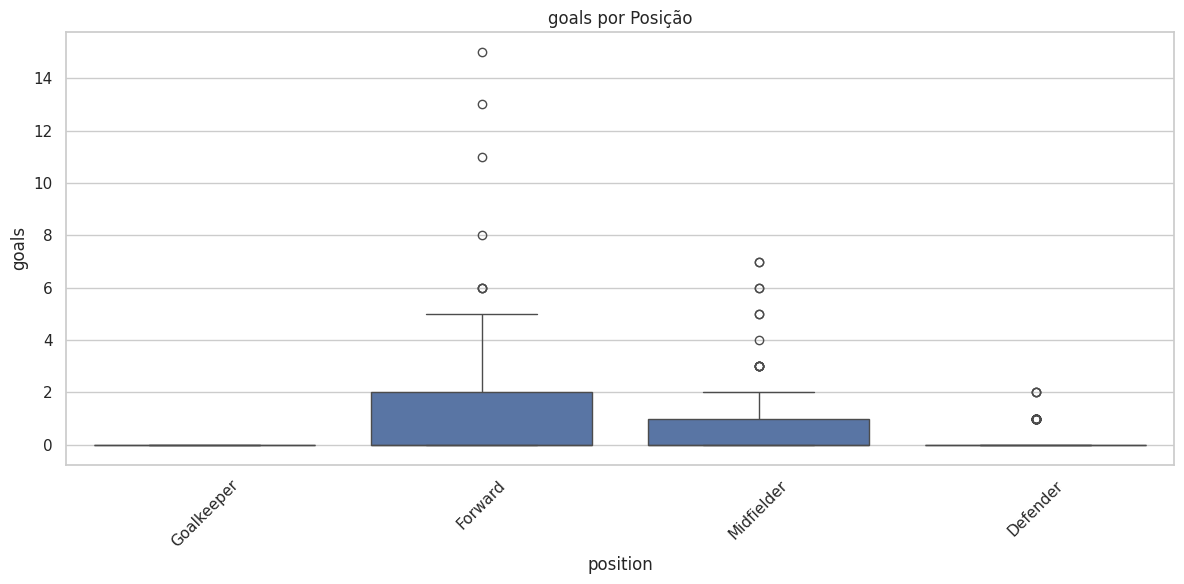

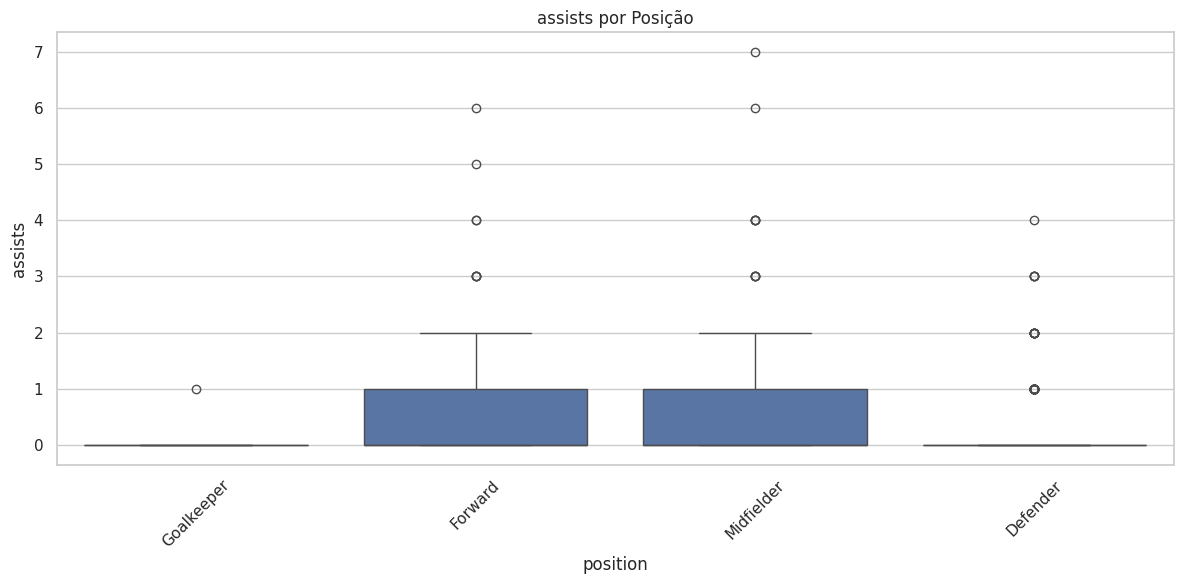

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Configura√ß√£o est√©tica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Caminhos
DATA_PATH = "../data/processed/key_stats_clean.csv"
PLOTS_DIR = "../results/plots"
os.makedirs(PLOTS_DIR, exist_ok=True)

# Carregando os dados
df = pd.read_csv(DATA_PATH)

# Exibir as primeiras linhas
display(df.head())

# Informa√ß√µes b√°sicas
print("\nüìå Informa√ß√µes Gerais:")
display(df.info())

# Estat√≠sticas descritivas
print("\nüìà Estat√≠sticas Descritivas:")
display(df.describe())

# Distribui√ß√£o das classes-alvo (position)
print("\nüìä Distribui√ß√£o da vari√°vel alvo 'position':")
sns.countplot(x="position", data=df, order=df["position"].value_counts().index)
plt.title("Distribui√ß√£o das posi√ß√µes dos jogadores")
plt.xlabel("Posi√ß√£o")
plt.ylabel("Contagem")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/distribuicao_posicoes.png", dpi=300, bbox_inches="tight")
plt.show()

# Verificar correla√ß√£o entre atributos num√©ricos
corr = df.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correla√ß√£o dos Atributos Num√©ricos")
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/correlacao_atributos.png", dpi=300, bbox_inches="tight")
plt.show()

# Boxplot de atributos mais relevantes por posi√ß√£o
selected_cols = ['minutes_played', 'goals', 'assists', 'distance_covered']
for col in selected_cols:
    sns.boxplot(x="position", y=col, data=df)
    plt.title(f"{col} por Posi√ß√£o")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/boxplot_{col}.png", dpi=300, bbox_inches="tight")
    plt.show()
